# About


In [7]:
import warnings

warnings.filterwarnings(
    "ignore", category=RuntimeWarning, message="overflow encountered in exp"
)

In [ ]:
import os

import matplotlib.pyplot as plt
import torch
from infomeasure import entropy
from torchvision import datasets, transforms

print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch Version: 2.9.1+cu126
CUDA available: True


In [14]:
# download mnist dataset to data directory

data_dir = os.path.join("../../../..", "data")
os.makedirs(data_dir, exist_ok=True)

transform = transforms.Compose([transforms.ToTensor()])
mnist_test = datasets.MNIST(
    root=data_dir, train=False, download=True, transform=transform
)


Digit      | Discrete H (bits)    | NSB H (bits)        
-------------------------------------------------------
7      | 0.9641          | 1.0094          | nan            
2      | 1.1801          | 1.2222          | nan            
1      | 0.5771          | 0.6084          | nan            


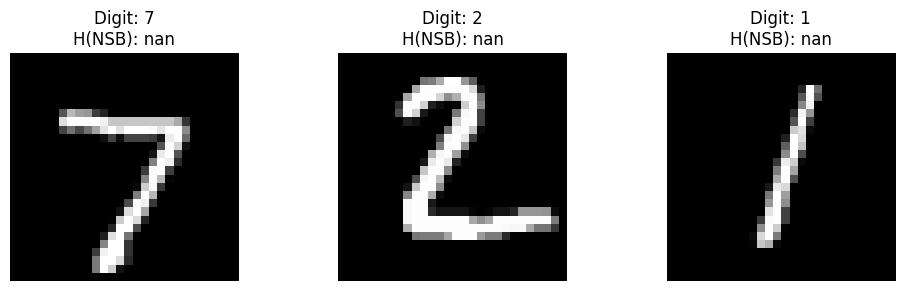

In [16]:
# select a few images for entropy estimation
num_samples = 3
indices = range(num_samples)

print(f"{'Digit':<10} | {'Discrete H (bits)':<20} | {'NSB H (bits)':<20}")
print("-" * 55)

plt.figure(figsize=(10, 3))

for i in indices:
    # get image and label
    img_tensor, label = mnist_test[i]

    # flatten mnist images 28x28 to 784 pixels
    # convert to 0-255 scale for discrete estimation
    img_np = (img_tensor.numpy().squeeze() * 255).astype(int)
    flattened_img = img_np.flatten()

    # maximum likelihood (standard discrete)
    h_discrete = entropy(flattened_img, approach="discrete")

    h_mm = entropy(flattened_img, approach="miller_madow")

    # nsb, k=256 represents the 8-bit grayscale range
    try:
        h_nsb = entropy(flattened_img, approach="nsb", k=256)
    except Exception as e:
        h_nsb = float("nan")

    print(f"{label:<6} | {h_discrete:<15.4f} | {h_mm:<15.4f} | {h_nsb:<15.4f}")

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img_np, cmap="gray")
    plt.title(f"Digit: {label}\nH(NSB): {h_nsb:.2f}")
    plt.axis("off")

plt.tight_layout()
plt.show()